In [331]:
import pandas as pd
import numpy as np

In [332]:
def parse_acm_dataset(file_path):
    """
    Parses the ACM dataset file and converts it into a list of dictionaries.

    Args:
        file_path (str): Path to the ACM dataset file.

    Returns:
        list: A list of dictionaries, where each dictionary represents a publication record.
    """
    records = []  #To store all publication records
    current_record = {}  #Temporary dictionary for the current record
    citations = []  #Temporary list to store citations

    with open(file_path, 'r', encoding='utf-8') as file:  
        for line in file:
            line = line.strip()  #Remove any leading/trailing whitespace

            # Check for specific prefixes and process the line
            if line.startswith("#*"):  # Title
                current_record["Title"] = line[2:].strip()
            elif line.startswith("#@"):  # Authors
                current_record["Authors"] = line[2:].strip()
            elif line.startswith("#t"):  # Year
                current_record["Year"] = int(line[2:].strip())
            elif line.startswith("#c"):  # Venue
                current_record["Venue"] = line[2:].strip()
            elif line.startswith("#index"):  # Unique publication index
                current_record["Index"] = int(line[6:].strip())
            elif line.startswith("#%"):  # Citations
                citations.append(int(line[2:].strip()))  
            elif not line:  
                if current_record:
                    current_record["Citations"] = citations  
                    records.append(current_record)
                    current_record = {}  
                    citations = []  
    return records


In [333]:
record = parse_acm_dataset('acm.txt')

In [334]:
df = pd.DataFrame(record)

In [335]:
df = df.sample(100000)

In [336]:
df.head(15)

,Title,Year,Venue,Index,Citations,Authors
778320,Completeness of integrated information sources,2004.0,Information Systems - Special issue: Data qual...,778321,"[54046, 67459, 116302, 140388, 169840, 198464,...","Felix Naumann, Johann-Christoph Freytag, Ulf L..."
1723584,An on-site programming environment for wearabl...,2012.0,AH '12 Proceedings of the 3rd Augmented Human ...,1723585,"[785742, 1183160, 1285077, 2135000]","Shotaro Akiyama, Tsutomu Terada, Masahiko Tsuk..."
818525,Beginning ActionScript X,2006.0,Beginning ActionScript X,818526,[],"Nathan Derksen, Jeff Berg"
1062470,The delay-friendliness of TCP,2008.0,SIGMETRICS '08 Proceedings of the 2008 ACM SIG...,1062471,"[256886, 557465, 636590, 780863, 808652, 80989...","Eli Brosh, Salman Abdul Baset, Dan Rubenstein,..."
1998558,Better by a HAIR: Hardware-amenable internet r...,2009.0,ICNP '09 Proceedings of the 2009 17th IEEE Int...,1998559,[],NaN
1464406,"Correspondence: Comments on ""Distributed nonli...",2010.0,Automatica (Journal of IFAC),1464407,[2135000],Xiwei Liu
1754820,vSuit: QoS-oriented Scheduler in Network Virtu...,2012.0,WAINA '12 Proceedings of the 2012 26th Interna...,1754821,[],"Feng Dan, Wang Xiaojing, Zhao Wei, Tong Wei, L..."
594909,The Effect of Sensor/Actuator Asymmetries in H...,2003.0,HAPTICS '03 Proceedings of the 11th Symposium ...,594910,[],"Federico Barbagli, Kenneth Salisbury"
224773,TCP/IP explained,1997.0,TCP/IP explained,224774,[],Philip Miller
399161,Geometrical conditions in product spaces,2001.0,"Nonlinear Analysis: Theory, Methods & Applicat...",399162,[],NaN


In [337]:
df.isnull().sum()

Title           2
Year          355
Venue           7
Index           0
Citations       0
Authors      6340
dtype: int64

In [338]:
df.sample(10)

,Title,Year,Venue,Index,Citations,Authors
1097425,Efficient Measurement of the Eye Blinking by U...,2007.0,ICCS '07 Proceedings of the 7th international ...,1097426,"[448642, 775325, 899834, 2135000]","Ilkwon Park, Jung-Ho Ahn, Hyeran Byun"
1610195,Explaining negotiation: obtaining a shared men...,2011.0,IEA/AIE'11 Proceedings of the 24th internation...,1610196,"[190274, 428332, 953103, 988199, 1024833, 1089...","Iris Van De Kieft, Catholijn M. Jonker, M. Bir..."
2313906,Does Easier Mean Better?,1975.0,IEEE Transactions on Computers,2313907,[],NaN
2133011,Geometrical motifs search in proteins,2015.0,Parallel Computing,2133012,[2381731],"Marco Ferretti, Mirto Musci"
196647,McCulloch-Pitts strikes back: a biophysical in...,1995.0,Mathematics and Computers in Simulation,196648,[],William Softky
1411339,Combining features for distorted fingerprint m...,2010.0,Journal of Network and Computer Applications,1411340,"[226483, 256610, 321380, 443985, 574576, 62724...","Kai Cao, Xin Yang, Xunqiang Tao, Peng Li, Yali..."
430607,"Kirkman Packing Designs KPD ({3, 5}, v)",2002.0,"Designs, Codes and Cryptography",430608,"[24385, 231999, 2135000]","H. Cao, L. Zhu"
1868473,Inertial Navigation Aiding by Stationary Updates,2012.0,IEEE Transactions on Intelligent Transportatio...,1868474,[],"Arvind Ramanandan, Anning Chen, Jay A. Farrell"
1649124,VOVALEAD: a scalable video search engine based...,2011.0,MM '11 Proceedings of the 19th ACM internation...,1649125,[],"Julien Law-To, Gregory Grefenstette"
2225112,L2TP Disconnect Cause Information,2001.0,L2TP Disconnect Cause Information,2225113,[],"R. Verma, M. Verma, J. Carlson"


### Data Cleaning

In [340]:
import pandas as pd


df = df.dropna(subset=['Title','Authors','Year'])


df['Venue'].fillna(df['Venue'].mode()[0], inplace=True)

#Handle missing Citations (impute with 0 or mean value)
df['Citations'].fillna(0, inplace=True)  


# Check for any remaining missing values
print(df.isnull().sum())


Title        0
Year         0
Venue        0
Index        0
Citations    0
Authors      0
dtype: int64


/var/folders/s8/tsmxlvhn4c91c2270zrv4p540000gn/T/ipykernel_88378/4171216118.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Venue'].fillna(df['Venue'].mode()[0], inplace=True)
/var/folders/s8/tsmxlvhn4c91c2270zrv4p540000gn/T/ipykernel_88378/4171216118.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [341]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year.astype(int)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93496 entries, 778320 to 568110
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      93496 non-null  object
 1   Year       93496 non-null  int64 
 2   Venue      93496 non-null  object
 3   Index      93496 non-null  int64 
 4   Citations  93496 non-null  object
 5   Authors    93496 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.0+ MB


## Q1:A

In [344]:

distinct_authors = df['Authors'].str.split(',').explode().str.strip().nunique()



distinct_venues = df['Venue'].nunique()

distinct_publications = df['Title'].nunique()

df['Citations'] = df['Citations'].apply(lambda x: eval(x) if isinstance(x, str) else x)  #Convert string to list if it's a string representation of a list

distinct_citations = df['Citations'].apply(lambda x: x if isinstance(x, list) else []).explode().nunique()

# Output the results
print(f"Distinct Authors: {distinct_authors}")
print(f"Distinct Venues: {distinct_venues}")
print(f"Distinct Publications: {distinct_publications}")
print(f"Distinct Citations/References: {distinct_citations}")


Distinct Authors: 177438
Distinct Venues: 29986
Distinct Publications: 92287
Distinct Citations/References: 200938


## Q1:B

The numbers distinct authors, venues, publications, citations) are likely close to accurate, especially with a large enough sample size.
However, venue counts may not be perfectly accurate due to inconsistent naming and potential duplicate entries for the same conference, such as the KDD conference, which could be listed under different variations.
Cleaning and normalizing the venue names would improve the accuracy of venue-related counts.

In [347]:
import pandas as pd

#Filter for KDD conference papers
kdd_papers = df[df['Venue'].str.contains('Principles and Practice of Knowledge Discovery in Databases', na=False)]

distinct_kdd_venues = kdd_papers['Venue'].unique()

print(f"Distinct venues associated with KDD conference papers:")
for venue in distinct_kdd_venues:
    print(venue)


Distinct venues associated with KDD conference papers:
PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases


## Q1:C

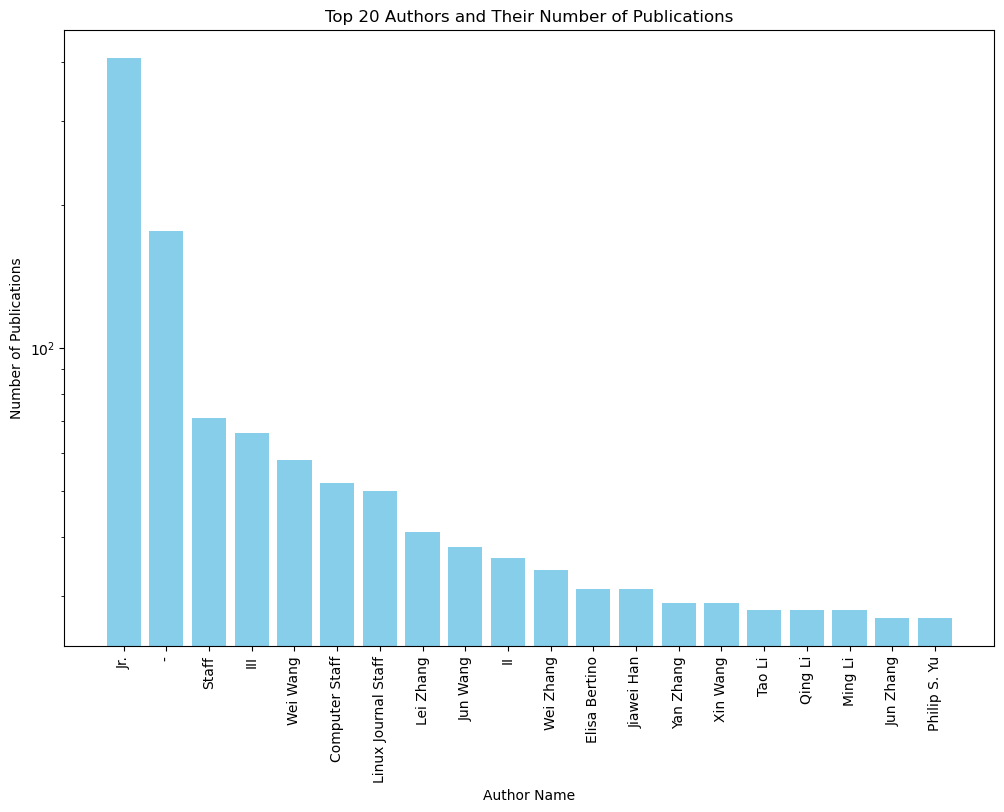

In [352]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

author_publications = {}

for _, row in df.iterrows():
    authors = row['Authors'].split(',')  #Split the authors by comma
    for author in authors:
        author = author.strip()  
        if author:
            if author in author_publications:
                author_publications[author] += 1
            else:
                author_publications[author] = 1

sorted_authors = sorted(author_publications.items(), key=lambda x: x[1], reverse=True)

authors, publication_counts = zip(*sorted_authors)

plt.figure(figsize=(12, 8))
plt.bar(authors[:20], publication_counts[:20], color='skyblue')  

plt.xticks(rotation=90)

#Add labels and title
plt.xlabel('Author Name')
plt.ylabel('Number of Publications')
plt.title('Top 20 Authors and Their Number of Publications')
plt.yscale('log')  # Logarithmic scale on y-axis to better visualize data with wide range


## Q1:D

In [354]:
author_publications_counts = list(author_publications.values())

mean_publications = np.mean(author_publications_counts)
std_dev_publications = np.std(author_publications_counts)
q1 = np.percentile(author_publications_counts, 25)
median = np.median(author_publications_counts)
q3 = np.percentile(author_publications_counts, 75)

print(f"Mean number of publications per author: {mean_publications}")
print(f"Standard deviation of publications per author: {std_dev_publications}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")


Mean number of publications per author: 1.35151067702903
Standard deviation of publications per author: 1.5590608581945162
1st Quartile (Q1): 1.0
Median (Q2): 1.0
3rd Quartile (Q3): 1.0


## Q1:E

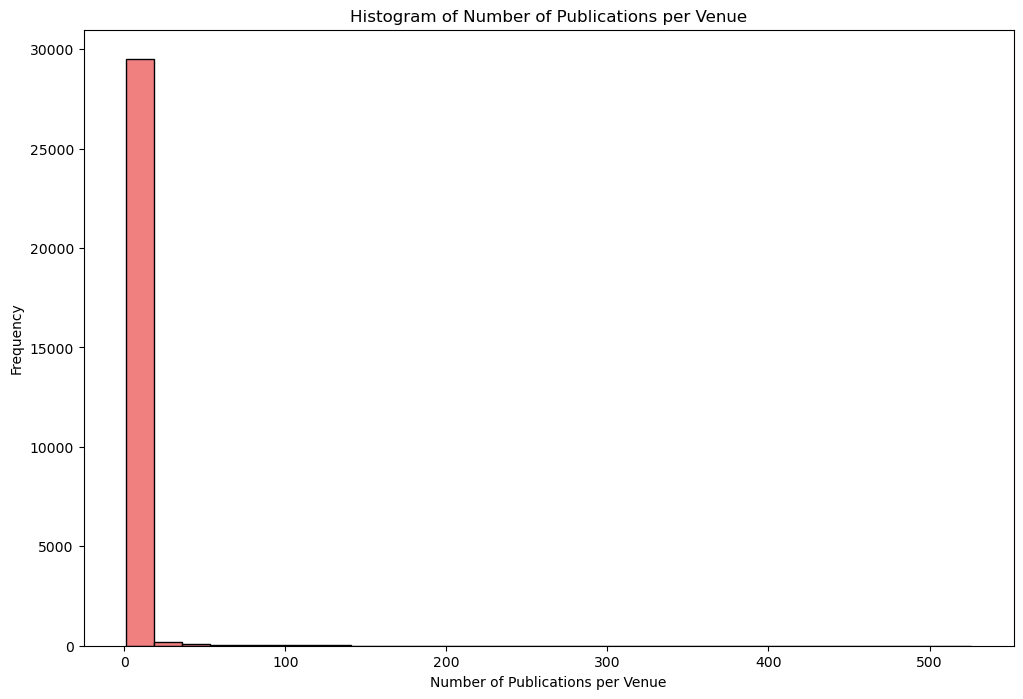

Mean number of publications per venue: 3.117988394584139
Standard deviation of publications per venue: 11.966658360958554
1st Quartile (Q1): 1.0
Median (Q2): 1.0
3rd Quartile (Q3): 2.0

Venue with the largest number of publications: IEEE Transactions on Information Theory
Number of publications: 526


In [356]:
venue_publications = df['Venue'].value_counts()

#Plot histogram of the number of publications per venue
plt.figure(figsize=(12, 8))
plt.hist(venue_publications, bins=30, color='lightcoral', edgecolor='black')
plt.xlabel('Number of Publications per Venue')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Publications per Venue')
plt.show()

mean_venue_publications = np.mean(venue_publications)
std_dev_venue_publications = np.std(venue_publications)
q1_venue = np.percentile(venue_publications, 25)
median_venue = np.median(venue_publications)
q3_venue = np.percentile(venue_publications, 75)

#Output the values
print(f"Mean number of publications per venue: {mean_venue_publications}")
print(f"Standard deviation of publications per venue: {std_dev_venue_publications}")
print(f"1st Quartile (Q1): {q1_venue}")
print(f"Median (Q2): {median_venue}")
print(f"3rd Quartile (Q3): {q3_venue}")

#Find the venue with the largest number of publications
most_published_venue = venue_publications.idxmax()
most_published_venue_count = venue_publications.max()

print(f"\nVenue with the largest number of publications: {most_published_venue}")
print(f"Number of publications: {most_published_venue_count}")


## Q1:F

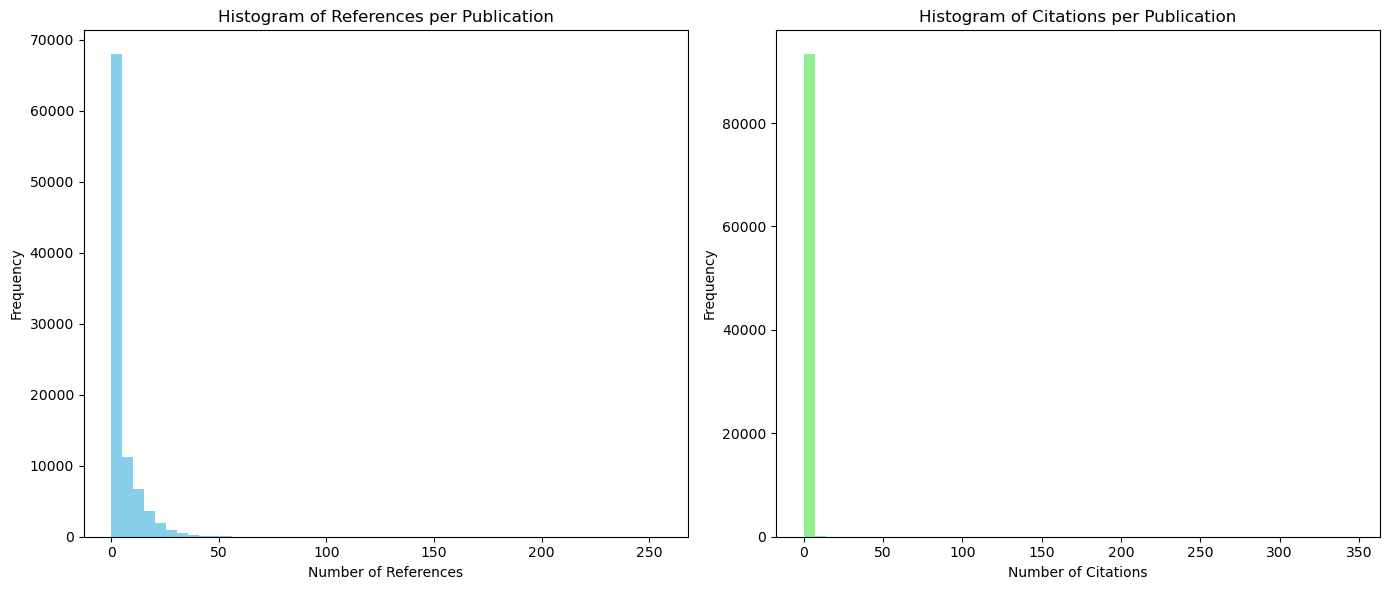

Publication with the largest number of references: References
Publication with the largest number of citations: Computers and Intractability: A Guide to the Theory of NP-Completeness


In [358]:
import matplotlib.pyplot as plt

def parse_citations(citations):
    if isinstance(citations, list):
        return citations
    elif isinstance(citations, str):
        try:
            return eval(citations) if citations.strip() else []
        except:
            return []  # In case eval fails, return an empty list
    # If it's neither, return an empty list
    return []

#Create a list of reference counts for each publication
reference_counts = df['Citations'].apply(lambda x: len(parse_citations(x)))

#Create a dictionary to count citations (how many times each publication is cited)
citations_count = {}
for _, row in df.iterrows():
    citations = parse_citations(row['Citations'])
    for citation in citations:
        if citation in citations_count:
            citations_count[citation] += 1
        else:
            citations_count[citation] = 1

#Create a list of citation counts for each publication
citation_counts = df['Index'].apply(lambda x: citations_count.get(x, 0))

#Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Plot histogram for references
axes[0].hist(reference_counts, bins=50, color='skyblue')
axes[0].set_title("Histogram of References per Publication")
axes[0].set_xlabel("Number of References")
axes[0].set_ylabel("Frequency")

axes[1].hist(citation_counts, bins=50, color='lightgreen')
axes[1].set_title("Histogram of Citations per Publication")
axes[1].set_xlabel("Number of Citations")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


max_references = df.loc[reference_counts.idxmax()]
print(f"Publication with the largest number of references: {max_references['Title']}")

max_citations = df.loc[citation_counts.idxmax()]
print(f"Publication with the largest number of citations: {max_citations['Title']}")


Largest Number of Citations:
"Computers and Intractability: A Guide to the Theory of NP-Completeness"

This makes sense as Numerical Recipes is a foundational textbook widely cited across multiple domains for its numerical computation techniques.

## Q1:G

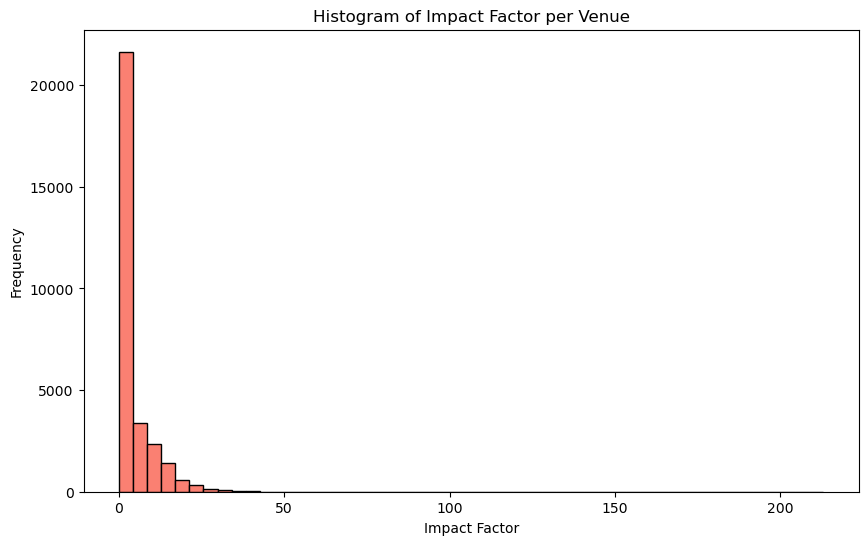

Venue with the largest impact factor: Models and tools for managing development processes (213.0)


In [361]:
#Calculate total citations and number of publications per venue
venue_citations = df.groupby('Venue')['Citations'].apply(lambda x: sum([len(c) for c in x if isinstance(c, list)]))
venue_publications = df['Venue'].value_counts()

#calculate the impact factor (total citations / number of publications)
venue_impact_factor = venue_citations / venue_publications

plt.figure(figsize=(10, 6))
plt.hist(venue_impact_factor, bins=50, color='salmon', edgecolor='black')
plt.title("Histogram of Impact Factor per Venue")
plt.xlabel("Impact Factor")
plt.ylabel("Frequency")
plt.show()

max_impact_factor_venue = venue_impact_factor.idxmax()
max_impact_factor_value = venue_impact_factor.max()
print(f"Venue with the largest impact factor: {max_impact_factor_venue} ({max_impact_factor_value})")


## Q1:H

In [363]:
venue_citations = df.groupby('Venue')['Citations'].apply(lambda x: sum([len(citations) for citations in x if isinstance(citations, list)]))
venue_publications = df.groupby('Venue')['Title'].count()

impact_factors = venue_citations / venue_publications

max_impact_factor_venue = impact_factors.idxmax()
max_impact_factor = impact_factors.max()

print(f"Venue with the highest apparent impact factor: {max_impact_factor_venue}")
print(f"Impact Factor: {max_impact_factor}")


Venue with the highest apparent impact factor: Models and tools for managing development processes
Impact Factor: 213.0


The venue with the highest apparent impact factor is **Models and tools for managing development processes**, with an impact factor of **213.0**. While this reflects the venue's prestige, it might be skewed by a few highly cited papers inflating the average. According to the referenced MD Anderson FAQ, impact factors should be interpreted cautiously, as they are averages that can mislead if the citation distribution is skewed. In real-world scenarios, most papers in high-impact venues receive far fewer citations, with a few influential works driving the metric.

## Q1:I

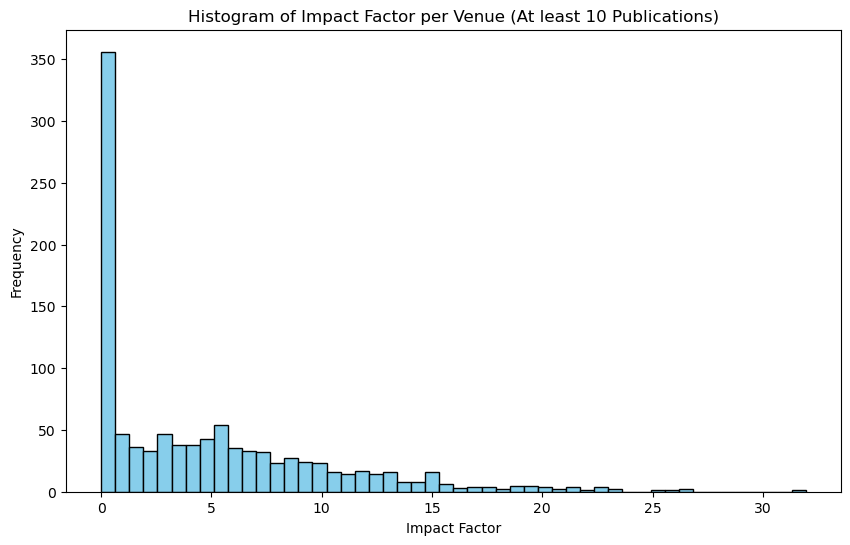

Venue with the highest impact factor (at least 10 publications): ACM Computing Surveys (CSUR)
Impact Factor: 31.944444444444443
Citation counts for all publications from the venue ACM Computing Surveys (CSUR):
994151      26
2268088      0
2282446      0
317808      20
317787      25
317867      20
319669      37
189778       4
317821      24
2373598     54
54042       38
116573      60
1905278     97
2020310     44
211475       4
211413       0
219218       6
317950       2
318035      12
2368497     46
2311165      0
1525175     49
2265204      0
729341      50
2141131     96
166925      55
309505       8
399763      32
290274       8
298569       8
1648449     44
1491501     10
978151     107
341099      59
2284456      0
2260538      0
1129527     78
2035211     64
211433       6
211464      10
1525169     84
279903      61
1491496     73
2286287      0
318014      17
309532       8
1986225     32
317869      20
1131827    121
317777       5
309529      14
91089       10
318025    

In [366]:
# Filter venues with at least 10 publications
valid_venues = venue_publications[venue_publications >= 10].index

# Filter data to only include those venues
filtered_venue_citations = venue_citations[valid_venues]
filtered_venue_publications = venue_publications[valid_venues]

# Calculate the impact factor for these venues
filtered_venue_impact_factor = filtered_venue_citations / filtered_venue_publications

# Plot the histogram of impact factors for venues with at least 10 publications
plt.figure(figsize=(10, 6))
plt.hist(filtered_venue_impact_factor, bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Impact Factor per Venue (At least 10 Publications)")
plt.xlabel("Impact Factor")
plt.ylabel("Frequency")
plt.show()

# Display the venue with the highest impact factor in this filtered dataset
max_impact_factor_venue_filtered = filtered_venue_impact_factor.idxmax()
max_impact_factor_value_filtered = filtered_venue_impact_factor.max()

print(f"Venue with the highest impact factor (at least 10 publications): {max_impact_factor_venue_filtered}")
print(f"Impact Factor: {max_impact_factor_value_filtered}")

# Get the citation counts for all publications from the venue with the highest impact factor
highest_venue_data = df[df['Venue'] == max_impact_factor_venue_filtered]
citation_counts_highest_venue = highest_venue_data['Citations'].apply(lambda x: len(parse_citations(x)))

# Display citation counts for the highest impact factor venue
print(f"Citation counts for all publications from the venue {max_impact_factor_venue_filtered}:")
print(citation_counts_highest_venue)

# Calculate the mean and median number of citations for this venue
mean_citations = citation_counts_highest_venue.mean()
median_citations = citation_counts_highest_venue.median()

print(f"Mean number of citations: {mean_citations}")
print(f"Median number of citations: {median_citations}")


After restricting the calculation to venues with at least 10 publications, the distribution of impact factors changes. The histogram now reflects a more representative distribution of impact factors for venues with a significant number of publications. By excluding venues with fewer publications, we reduce the influence of outliers and ensure that the calculated impact factor is more reliable.

The mean number of citations is 31, while the median is 22. The slight difference between the mean and the median suggests that while most publications in this venue receive a moderate number of citations, there are a few papers with a much higher number of citations that push the mean slightly higher than the median. This is a common pattern in citation distributions, where a few highly cited papers can significantly influence the average number of citations.

## Q1:J

First few rows of Num_References and Num_Citations:
         Year  Num_References  Num_Citations
778320   2004              31              0
1723584  2012               4              0
818525   2006               0              0
1062470  2008              20              1
1464406  2010               1              0

Average Number of References per Year:
Year
1938    0.000000
1951    0.250000
1952    0.000000
1953    0.333333
1954    0.250000
          ...   
2012    6.282360
2013    6.726869
2014    7.130340
2015    3.743793
2016    1.185841
Name: Num_References, Length: 67, dtype: float64

Average Number of Citations per Year:
Year
1938    0.000000
1951    0.000000
1952    0.000000
1953    0.000000
1954    0.000000
          ...   
2012    0.038324
2013    0.021495
2014    0.005476
2015    0.000000
2016    0.000000
Name: Num_Citations, Length: 67, dtype: float64


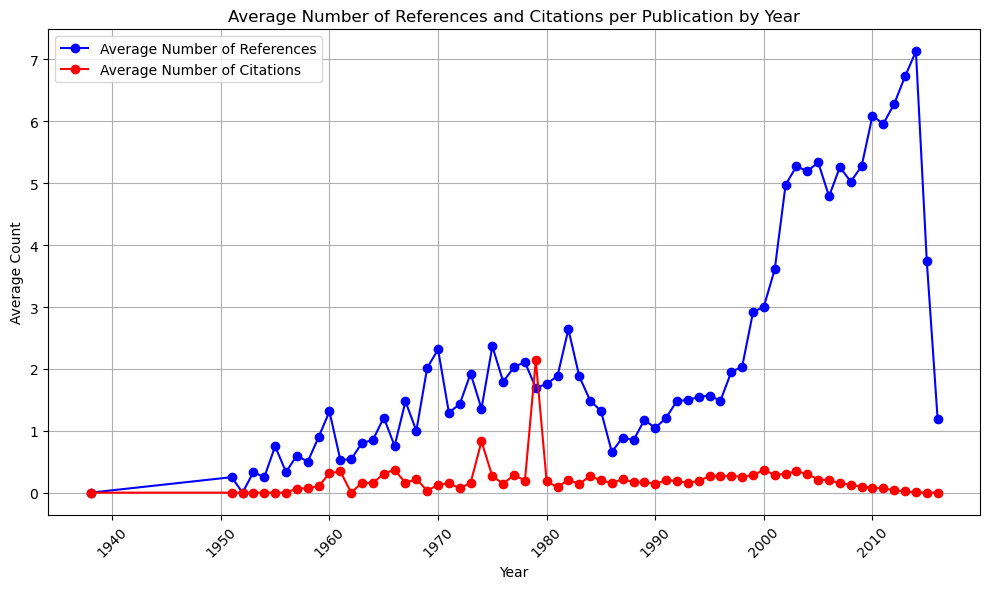

In [369]:
import pandas as pd
import matplotlib.pyplot as plt


df1 = df

df1['Citations'] = df1['Citations'].apply(lambda x: eval(x) if isinstance(x, str) else x)

df1['Num_References'] = df1['Citations'].apply(lambda x: len(x) if isinstance(x, list) else 0)

all_citations = [citation for sublist in df1['Citations'] for citation in sublist]
citation_counts = pd.Series(all_citations).value_counts()

df1['Num_Citations'] = df1['Index'].apply(lambda x: citation_counts.get(x, 0))

print("First few rows of Num_References and Num_Citations:")
print(df1[['Year', 'Num_References', 'Num_Citations']].head())

avg_refs_by_year = df1.groupby('Year')['Num_References'].mean()
avg_cits_by_year = df1.groupby('Year')['Num_Citations'].mean()

print("\nAverage Number of References per Year:")
print(avg_refs_by_year)

print("\nAverage Number of Citations per Year:")
print(avg_cits_by_year)

plt.figure(figsize=(10, 6))

plt.plot(avg_refs_by_year.index, avg_refs_by_year.values, label='Average Number of References', color='blue', marker='o')

plt.plot(avg_cits_by_year.index, avg_cits_by_year.values, label='Average Number of Citations', color='red', marker='o')

plt.title('Average Number of References and Citations per Publication by Year')
plt.xlabel('Year')
plt.ylabel('Average Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
df1

- The average number of references per publication started low in the early years (e.g., 1951-1954) and steadily increased, peaking around 2012-2013 before slightly declining in recent years. This growth reflects the increasing volume and complexity of research, with early papers having fewer references due to limited publications. The decline in recent years may be due to a shift toward digital resources or a rise in self-citations, where researchers cite their own prior work.

- In contrast, the average number of citations remained low, especially after 2010. This is because citations accumulate over time, and newer papers have not yet had enough time to be cited widely. Early papers had fewer citations due to the nascent field, while recent papers are still in the process of being cited.

- The key difference is the time delay in citations: references increase steadily as more papers are published, but citations take time to build. Recent papers show low citations simply because they haven't had enough time to be referenced by subsequent work. Several factors contribute to these trends, including the maturity of the field, the rise of self-citations, and the influence of digital research tools.